## Intelligent Systems - HW2
### Soroush Mesforush Mashhad
#### SID: 810198472

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import random
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , Dense , MaxPooling2D , Dropout
from tensorflow.keras.optimizers import SGD , Adam 

**Part A : Has been answered in the report**

**Part B : Trasnfer Learning on EfficientNetB0**



Here we shall import the stuff needed for preprocessing the image

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input
from keras.applications.efficientnet import decode_predictions

In [ ]:
modelEffnet = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 0s 0us/step


Now we shall check the model summary just to be sure

In [ ]:
modelEffnet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 224, 224, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                     

Here we first load the image, then we go on to convert it to an array then we reshape it for our model, then we go on to preprocess it.

In [ ]:
MyImage = load_img('Teapot.jpg',target_size = (224, 224))
MyImage = img_to_array(MyImage)
MyImage = MyImage.reshape((1, MyImage.shape[0], MyImage.shape[1], MyImage.shape[2]))
MyImage = preprocess_input(MyImage)

In [ ]:
ypred = modelEffnet.predict(MyImage)
DecodedLabels = decode_predictions(ypred)
print(DecodedLabels[0][0][1])

1/1 [==============================] - 1s 1s/step
teapot


In [ ]:
#Most Probability #1
DecodedLabel1 = DecodedLabels[0][0]
print(f"Pred with first most probability is : {DecodedLabel1[1]}\nAccuracy : {DecodedLabel1[2]*100}%")
#Most Probability #2
DecodedLabel2 = DecodedLabels[0][1]
print(f"Pred with second most probability is : {DecodedLabel2[1]} \nAccuracy : {DecodedLabel2[2]*100}%")
#Most Probability #3
DecodedLabel3 = DecodedLabels[0][2]
print(f"Pred with third most probability is : {DecodedLabel3[1]} \nAccuracy : {DecodedLabel3[2]*100}%")

Pred with first most probability is : teapot
Accuracy : 77.83220410346985%
Pred with second most probability is : coffeepot 
Accuracy : 5.684347823262215%
Pred with third most probability is : water_jug 
Accuracy : 2.3913515731692314%


**Part C : Fixing a problem in the Network**

In [ ]:
def PhotoinModelChecker(DecodedLabels):
  for i in range(len(DecodedLabels[0])):
    if DecodedLabels[0][i][2]<0.5:
         DecodedLabels[0][i] = list(DecodedLabels[0][i])
         DecodedLabels[0][i][1] = 'others'
         DecodedLabels[0][i][2] = '-'
         DecodedLabels[0][i] = tuple(DecodedLabels[0][i])
  return DecodedLabels

In [ ]:
MyImage = load_img('ToothPaste.jpg',target_size = (224, 224))
MyImage = img_to_array(MyImage)
MyImage = MyImage.reshape((1, MyImage.shape[0], MyImage.shape[1], MyImage.shape[2]))
MyImage = preprocess_input(MyImage)

In [ ]:
ypred = modelEffnet.predict(MyImage)
DecodedLabels = decode_predictions(ypred)
DecodedLabels = PhotoinModelChecker(DecodedLabels)

35363/35363 [==============================] - 0s 0us/step


In [ ]:
#Most Probability #1
DecodedLabel1 = DecodedLabels[0][0]
print(f"Pred with first most probability is : {DecodedLabel1[1]}\nAccuracy : {DecodedLabel1[2]*100}%")
#Most Probability #2
DecodedLabel2 = DecodedLabels[0][1]
print(f"Pred with second most probability is : {DecodedLabel2[1]} \nAccuracy : {DecodedLabel2[2]*100}%")
#Most Probability #3
DecodedLabel3 = DecodedLabels[0][2]
print(f"Pred with third most probability is : {DecodedLabel3[1]} \nAccuracy : {DecodedLabel3[2]*100}%")

Pred with first most probability is : others
Accuracy : ----------------------------------------------------------------------------------------------------%
Pred with second most probability is : others 
Accuracy : ----------------------------------------------------------------------------------------------------%
Pred with third most probability is : others 
Accuracy : ----------------------------------------------------------------------------------------------------%


**Part 4 : Train with new dataset**

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
microsoft-catsvsdogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip -q /content/microsoft-catsvsdogs-dataset.zip
! rm PetImages/Cat/666.jpg
! rm PetImages/Dog/11702.jpg
! rm PetImages/Cat/*.db
! rm PetImages/Dog/*.db

replace MSR-LA - 3467.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
image_generator = ImageDataGenerator(validation_split=0.3, rescale=1/255.)    

train = image_generator.flow_from_directory(batch_size=128,
                                                 directory='/content/PetImages',
                                                 shuffle=True,
                                                 subset="training",
                                                 class_mode="binary",
                                                 target_size=(224, 224), 
                                                 classes = ["Cat", "Dog"])

valid = image_generator.flow_from_directory(batch_size=128,
                                                 directory='/content/PetImages',
                                                 shuffle=True,
                                                 subset="validation",
                                                 target_size=(224, 224), 
                                                 class_mode="binary",
                                                 classes = ["Cat", "Dog"])

Found 17500 images belonging to 2 classes.
Found 7498 images belonging to 2 classes.


In [ ]:
base_model =  EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
for layer in model.layers:
    layer.trainable = False
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1,kernel_initializer='he_uniform'))
model.add(keras.layers.Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 1280)        0         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 62721     
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4,112,292
Trainable params: 62,721
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
history = model.fit(
        train,
        validation_data=valid,
        epochs = 20)

Epoch 1/20
  8/137 [>.............................] - ETA: 1:16 - loss: 4.1126 - accuracy: 0.4873

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

137/137 [==============================] - 105s 715ms/step - loss: 1.1253 - accuracy: 0.5014 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 2/20
137/137 [==============================] - 87s 636ms/step - loss: 0.7618 - accuracy: 0.5078 - val_loss: 0.6893 - val_accuracy: 0.5447
Epoch 3/20
137/137 [==============================] - 88s 643ms/step - loss: 0.7309 - accuracy: 0.5053 - val_loss: 0.7074 - val_accuracy: 0.5011
Epoch 4/20
137/137 [==============================] - 87s 637ms/step - loss: 0.7692 - accuracy: 0.5066 - val_loss: 0.6868 - val_accuracy: 0.5940
Epoch 5/20
137/137 [==============================] - 87s 635ms/step - loss: 0.7900 - accuracy: 0.5075 - val_loss: 1.0678 - val_accuracy: 0.5000
Epoch 6/20
137/137 [==============================] - 101s 739ms/step - loss: 0.7862 - accuracy: 0.4958 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 7/20
137/137 [==============================] - 87s 635ms/step - loss: 0.7820 - accuracy: 0.5129 - val_loss: 0.7739 - val_accuracy: 0

Here we plot the accuracy and loss curves

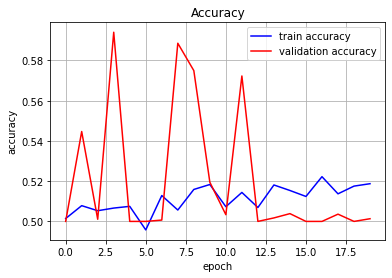

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'b', label='train accuracy')
plt.plot(history.history['val_accuracy'],'r', label='validation accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

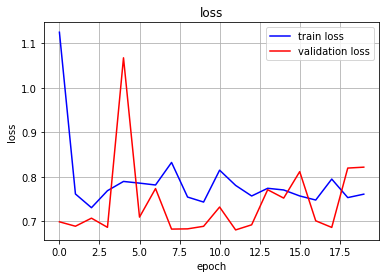

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],'b', label='train loss')
plt.plot(history.history['val_loss'],'r', label='validation loss')
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()